In [39]:
library(tidyverse)
tree_data <- read_csv("Sx.htdata.csv")
 
library(repr)

sxData <- tree_data |>
mutate(
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = (S_Latitude - P_Latitude),
    TX_Long = (S_Longitude - P_Longitude),
    TX_Elev = S_Elevation - P_Elevation
) 


sx_dbl <- sxData %>% select_if(is.double) |>select(-Height)

# standardize the double precision columns using scale()
sx_dbl_scaled <- scale(sx_dbl)

# bind the scaled double precision columns back to the original data frame
sx_scaled <- sxData
sx_scaled[, names(sx_dbl)] <- sx_dbl_scaled

# view the scaled data frame
head(sx_scaled)

Rows: 3240 Columns: 20
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): SITE
dbl (19): PROV, BLOCK, TREE, S_MAT, S_MCMT, S_MAP, S_MSP, S_Latitude, S_Long...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


SITE,PROV,BLOCK,TREE,S_MAT,S_MCMT,S_MAP,S_MSP,S_Latitude,S_Longitude,⋯,P_Longitude,Height,live,TX_MAP,TX_MSP,TX_MCMT,TX_MAT,TX_Lat,TX_Long,TX_Elev
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MID,-1.576429,0.2927248,0.3872386,0.167712,0.08287801,-0.09894209,1.06888,-0.04566807,-0.2475248,⋯,-0.207788,853.3361,0.3014648,0.379402,-0.5562762,1.347701,1.332605,-1.133403,-0.006424548,-0.07217491
MID,-1.576429,-0.2927248,-0.3872386,0.167712,0.08287801,-0.09894209,1.06888,-0.04566807,-0.2475248,⋯,-0.207788,827.0951,0.3014648,0.379402,-0.5562762,1.347701,1.332605,-1.133403,-0.006424548,-0.07217491
MID,-1.576429,-0.2927248,1.5489542,0.167712,0.08287801,-0.09894209,1.06888,-0.04566807,-0.2475248,⋯,-0.207788,804.8595,0.3014648,0.379402,-0.5562762,1.347701,1.332605,-1.133403,-0.006424548,-0.07217491
MID,-1.576429,0.2927248,1.5489542,0.167712,0.08287801,-0.09894209,1.06888,-0.04566807,-0.2475248,⋯,-0.207788,745.6832,0.3014648,0.379402,-0.5562762,1.347701,1.332605,-1.133403,-0.006424548,-0.07217491
MID,-1.576429,0.2927248,0.0000000,0.167712,0.08287801,-0.09894209,1.06888,-0.04566807,-0.2475248,⋯,-0.207788,832.1914,0.3014648,0.379402,-0.5562762,1.347701,1.332605,-1.133403,-0.006424548,-0.07217491
MID,-1.576429,0.2927248,-1.5489542,0.167712,0.08287801,-0.09894209,1.06888,-0.04566807,-0.2475248,⋯,-0.207788,838.4129,0.3014648,0.379402,-0.5562762,1.347701,1.332605,-1.133403,-0.006424548,-0.07217491


In [102]:
fcData <- read_csv("CD_N_M_S.csv") |> 
transmute(SSP = SSP,
          SITE = PROV,
          S_MCMT = MCMT,
          S_MAT = MAT,
          S_MAP = MAP,
          S_MSP = MSP,
          S_Lat = Lat,
          S_Long = long,
          S_Elev = elev,
         GCM = GCM) 

sxData2 <- subset(sxData, PROV %in% c(34, 40, 63))
sxData2 <- unique(subset(sxData2, select = c(PROV, P_MAT, P_MCMT, P_MAP, P_MSP, P_Latitude, P_Longitude, P_Elevation)))
fcdat2 <- merge(fcData, sxData2)

fcdat2 <- fcdat2|>
mutate(
    TX_MAP = S_MAP -P_MAP,
    TX_MSP = S_MSP -P_MSP,
    TX_MCMT = S_MCMT - P_MCMT,
    TX_MAT = S_MAT - P_MAT,
    TX_Lat = (S_Lat - P_Latitude),
    TX_Long = (S_Long- P_Longitude),
    TX_Elev = S_Elev - P_Elevation)

sx_scaled <- sx_scaled |>
mutate(S_Lat = S_Latitude,
      S_Long = S_Longitude,
      S_Elev = S_Elevation) |>
select(-S_Latitude, -S_Longitude, -S_Elevation)

glimpse(sx_scaled)
glimpse(fcdat2)

Rows: 18 Columns: 271
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr   (1): PROV
dbl (270): GCM, Lat, long, elev, SSP, MAT, MWMT, MCMT, TD, MAP, MSP, AHM, SH...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 3,240
Columns: 27
$ SITE        <chr> "MID", "MID", "MID", "MID", "MID", "MID", "MID", "MID", "M…
$ PROV        <dbl> -1.576429, -1.576429, -1.576429, -1.576429, -1.576429, -1.…
$ BLOCK       <dbl> 0.2927248, -0.2927248, -0.2927248, 0.2927248, 0.2927248, 0…
$ TREE        <dbl> 0.3872386, -0.3872386, 1.5489542, 1.5489542, 0.0000000, -1…
$ S_MAT       <dbl> 0.167712, 0.167712, 0.167712, 0.167712, 0.167712, 0.167712…
$ S_MCMT      <dbl> 0.08287801, 0.08287801, 0.08287801, 0.08287801, 0.08287801…
$ S_MAP       <dbl> -0.09894209, -0.09894209, -0.09894209, -0.09894209, -0.098…
$ S_MSP       <dbl> 1.06888, 1.06888, 1.06888, 1.06888, 1.06888, 1.06888, 1.06…
$ P_MAT       <dbl> -1.3382105, -1.3382105, -1.3382105, -1.3382105, -1.3382105…
$ P_MCMT      <dbl> -1.39634949, -1.39634949, -1.39634949, -1.39634949, -1.396…
$ P_MAP       <dbl> -0.3882953, -0.3882953, -0.3882953, -0.3882953, -0.3882953…
$ P_MSP       <dbl> 0.5918863, 0.5918863, 0.5918863, 0.5918863, 0.5918863, 0.5…
$ P_Elevation <d

In [103]:
sx_dbl <- sxData %>% select_if(is.double) |>select(-Height)

# standardize the double precision columns using scale()
sx_dbl_scaled <- scale(sx_dbl)

# bind the scaled double precision columns back to the original data frame
sx_scaled <- sxData
sx_scaled[, names(sx_dbl)] <- sx_dbl_scaled

# view the scaled data frame

column_order = c('S_MAT',
             'S_MCMT',
             'S_MAP',
             'S_MSP',
                 'S_Lat',
                 'S_Long',
                 'S_Elev',
             'P_MAT',
             'P_MCMT',
             'P_MAP',
             'P_MSP',
             'P_Elevation',
             'P_Latitude',
             'P_Longitude',
             'TX_MAP',
             'TX_MSP',
             'TX_MCMT',
             'TX_MAT',
             'TX_Lat',
             'TX_Long',
             'TX_Elev')

sxData <- sxData |>
mutate(S_Lat = S_Latitude,
      S_Long = S_Longitude,
      S_Elev = S_Elevation)

sx_for_scale <- select(sxData, column_order) |> scale()
fcdat2_to_scale <- select(fcdat2, column_order)

glimpse(sx_for_scale)
glimpse(fcdat2_to_scale)

length(attr(sx_for_scale, "scaled:center"))
length(attr(fcdat2_to_scale, "scaled:center"))

# scaled_new_data <- as.data.frame(scale(fcdat2_to_scale, center = attr(sx_for_scale, "scaled:center"), 
#                                                   scale = attr(sx_for_scale, "scaled:scale")))

scaled_new_data <- as.data.frame(scale(fcdat2_to_scale, center = attr(sx_for_scale, "scaled:center"), 
                                                  scale = attr(sx_for_scale, "scaled:scale")))




# bind the scaled double precision columns back to the original data frame
fc_scaled <- fcdat2
fc_scaled[, names(scaled_new_data)] <- scaled_new_data

glimpse(fc_scaled)
# scaled_new_data


# # Calculate the mean and standard deviation of each column in the reference data frame
# mean_ref <- colMeans(df_ref)
# sd_ref <- apply(df_ref, 2, sd)

# # Center and scale the new data frame using the reference values
# df_new_centered <- sweep(df_new, 2, mean_ref, `-`)
# df_new_scaled <- sweep(df_new_centered, 2, sd_ref, `/`)

 num [1:3240, 1:21] 0.168 0.168 0.168 0.168 0.168 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:21] "S_MAT" "S_MCMT" "S_MAP" "S_MSP" ...
 - attr(*, "scaled:center")= Named num [1:21] 1.5 -13.3 573.7 240.3 54.4 ...
  ..- attr(*, "names")= chr [1:21] "S_MAT" "S_MCMT" "S_MAP" "S_MSP" ...
 - attr(*, "scaled:scale")= Named num [1:21] 2.39 4.83 87.59 6.24 4.24 ...
  ..- attr(*, "names")= chr [1:21] "S_MAT" "S_MCMT" "S_MAP" "S_MSP" ...
Rows: 54
Columns: 21
$ S_MAT       <dbl> -0.7, 1.1, 4.1, 4.3, 5.7, 8.3, 5.2, 6.7, 9.5, -0.7, 1.4, 4…
$ S_MCMT      <dbl> -17.3, -16.2, -12.9, -7.1, -7.5, -4.9, -4.9, -4.5, -2.2, -…
$ S_MAP       <dbl> 409, 514, 568, 541, 657, 708, 1029, 1091, 1146, 409, 518, …
$ S_MSP       <dbl> 199, 252, 272, 248, 271, 275, 301, 316, 302, 199, 257, 283…
$ S_Lat       <dbl> 59.68500, 59.68500, 59.68500, 54.19948, 54.19948, 54.19948…
$ S_Long      <dbl> -129.129, -129.129, -129.129, -125.002, -125.002, -125.002…
$ S_Elev      <dbl> 730, 730, 730, 670, 670, 67

[1] 21

[1] 0

Rows: 54
Columns: 25
$ SSP         <dbl> 0, 126, 585, 0, 126, 585, 0, 126, 585, 0, 126, 585, 0, 126…
$ SITE        <chr> "N", "N", "N", "M", "M", "M", "S", "S", "S", "N", "N", "N"…
$ S_MCMT      <dbl> -0.82878007, -0.60086555, 0.08287801, 1.28460910, 1.201731…
$ S_MAT       <dbl> -0.92241586, -0.16771198, 1.09012784, 1.17398383, 1.760975…
$ S_MAP       <dbl> -1.87989975, -0.68117825, -0.06469291, -0.37293558, 0.9513…
$ S_MSP       <dbl> -6.627056, 1.870540, 5.077180, 1.229212, 4.916848, 5.55817…
$ S_Lat       <dbl> 1.2467510, 1.2467510, 1.2467510, -0.0456683, -0.0456683, -…
$ S_Long      <dbl> -1.0818850, -1.0818850, -1.0818850, -0.2475248, -0.2475248…
$ S_Elev      <dbl> -0.5886858, -0.5886858, -0.5886858, -0.8190411, -0.8190411…
$ GCM         <dbl> 8, 8, 8, 8, 8, 8, 8, 8, 8, 13, 13, 13, 13, 13, 13, 13, 13,…
$ PROV        <dbl> 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40…
$ P_MAT       <dbl> -0.3951763, -0.3951763, -0.3951763, -0.3951763, -0.3951763…
$ P_MCMT      <dbl>

In [105]:
model.11 <- lm(Height ~ 
              S_MAT + 
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sx_scaled)
# R-squared: 0.8358   standard error: 145.1

model.21 <- lm(Height ~ 
              S_MAT + I(S_MAT^2) +
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sx_scaled)
# R-squared: 0.8409   standard error: 14

model.31 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              TX_Lat + I(TX_Lat^2) +
              TX_Long,
              data = sx_scaled)
# R-squared: 0.8709   standard error: 128.7

model.41 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              I((TX_Lat)^2) +
              (TX_Long),
              data = sx_scaled)
# R-squared: 0.8708   standard error: 128.8

model.51 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) + 
              S_MAP + I(S_MAP^2), 
              data = sx_scaled)
# R-squared: 0.8428   standard error: 142

model.61 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              S_MAT + I(S_MAT^2), 
              data = sx_scaled)
# R-squared: 0.8411   standard error: 142.8

model.71 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              P_MAT + I(P_MAT^2), 
              data = sx_scaled)
# R-squared: 0.8299   standard error: 147.7

model.81 <- lm(Height ~ 
              TX_MAT + I(TX_MAT^2) + 
              S_MCMT + I(S_MCMT^2), 
              data = sx_scaled)

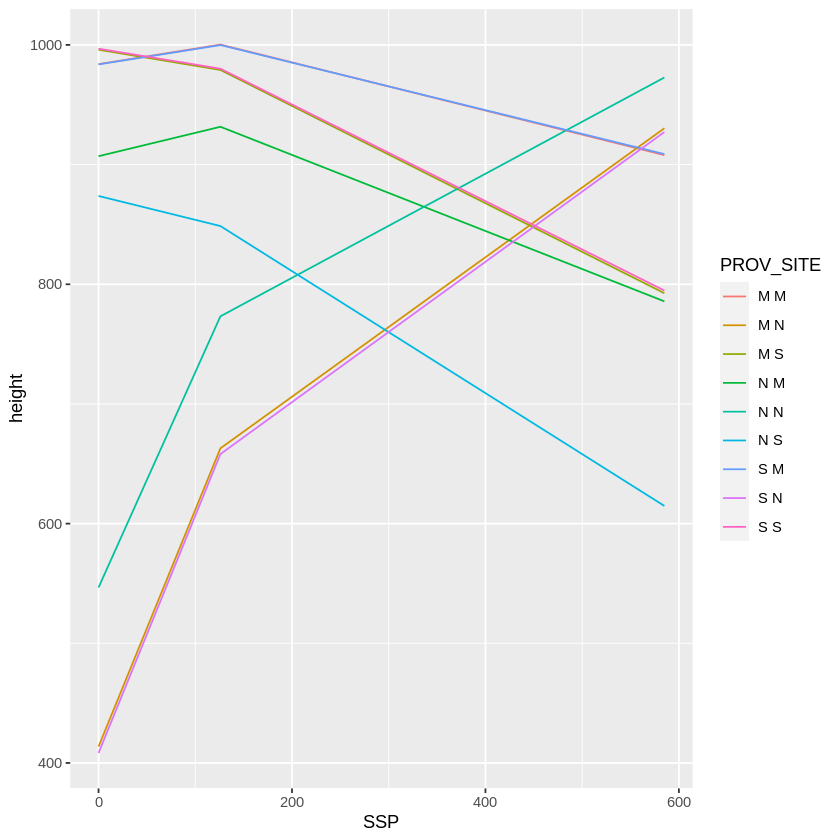

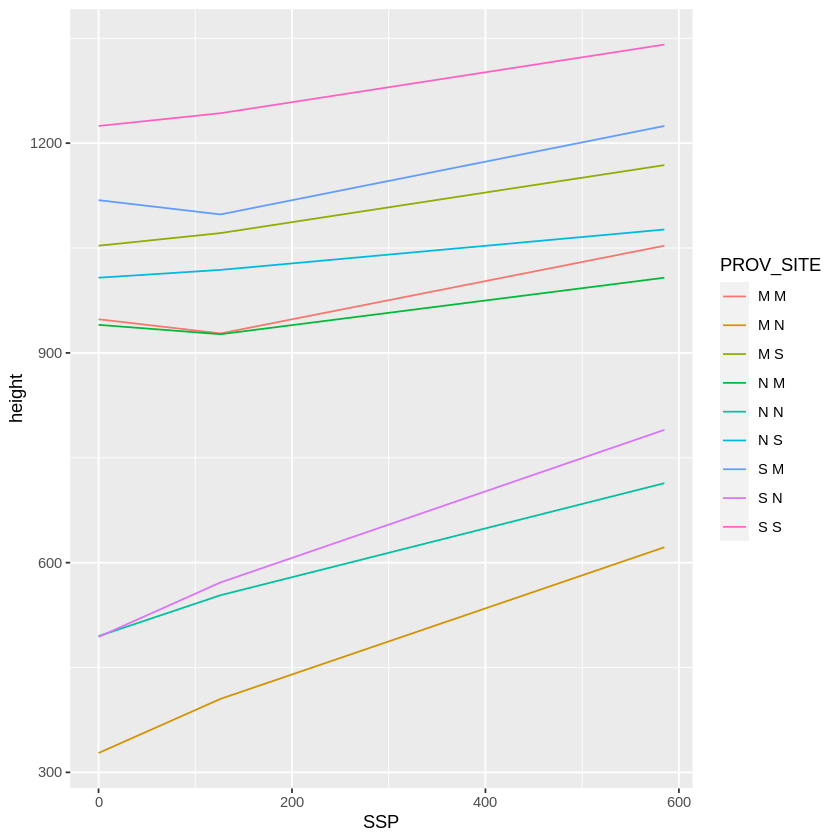

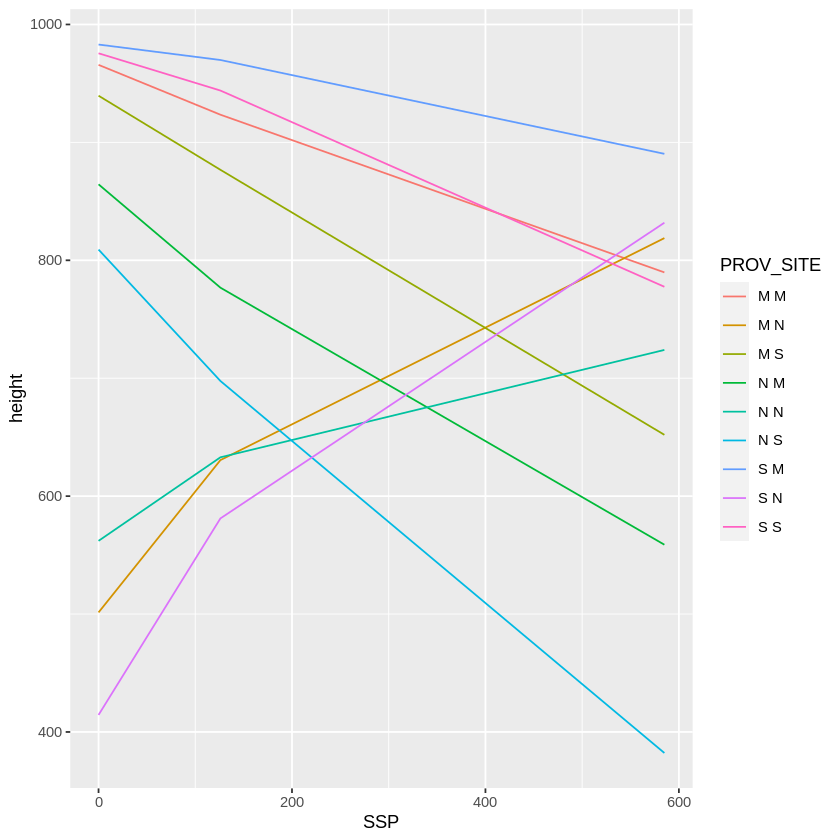

In [117]:
pred_height <- predict(model.61, fc_scaled)
pred_table <- tibble (fc_scaled$SITE, fc_scaled$PROV, fc_scaled$SSP, fc_scaled$GCM, pred_height) |> 
transmute(SITE = as_factor(fc_scaled$SITE),
          PROV = fc_scaled$PROV, 
          SSP = fc_scaled$SSP, 
          GCM = fc_scaled$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))

pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)

pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_height <- predict(model.71, fc_scaled)
pred_table <- tibble (fc_scaled$SITE, fc_scaled$PROV, fc_scaled$SSP, fc_scaled$GCM, pred_height) |> 
transmute(SITE = as_factor(fc_scaled$SITE),
          PROV = fc_scaled$PROV, 
          SSP = fc_scaled$SSP, 
          GCM = fc_scaled$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))

pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)

pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_height <- predict(model.81, fc_scaled)
pred_table <- tibble (fc_scaled$SITE, fc_scaled$PROV, fc_scaled$SSP, fc_scaled$GCM, pred_height) |> 
transmute(SITE = as_factor(fc_scaled$SITE),
          PROV = fc_scaled$PROV, 
          SSP = fc_scaled$SSP, 
          GCM = fc_scaled$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))

pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)

pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

SITE,PROV,SSP,GCM,height,PROV_FCT,PROV_SITE
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
N,40,0,8,-22214897,M,M N
N,40,126,8,-35128951,M,M N
N,40,585,8,-42917751,M,M N
M,40,0,8,-38925154,M,M M
M,40,126,8,-57454680,M,M M
M,40,585,8,-66739347,M,M M


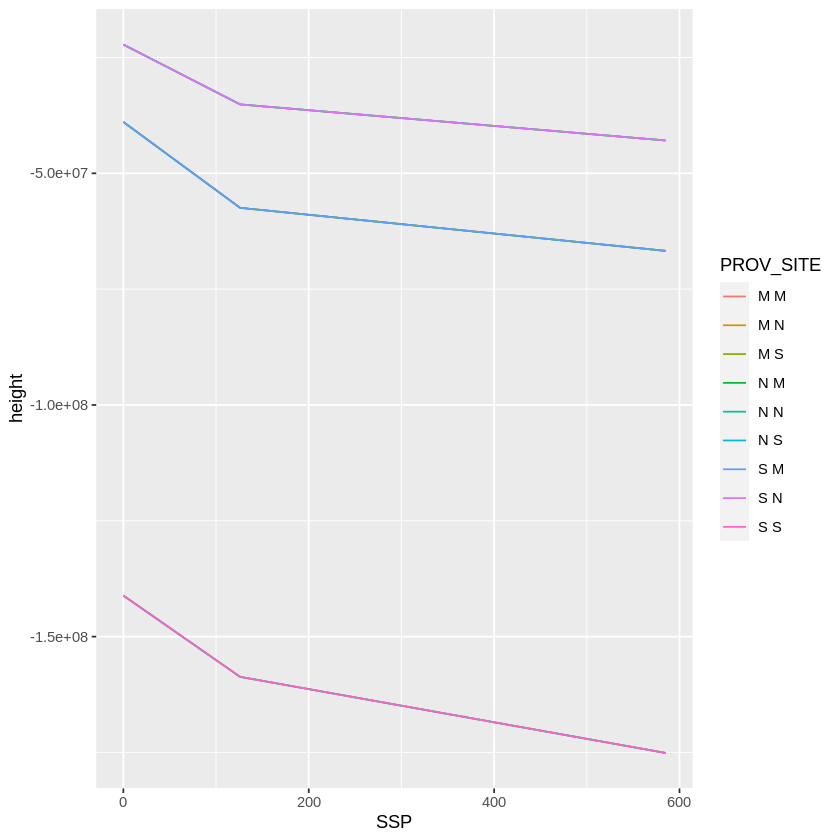

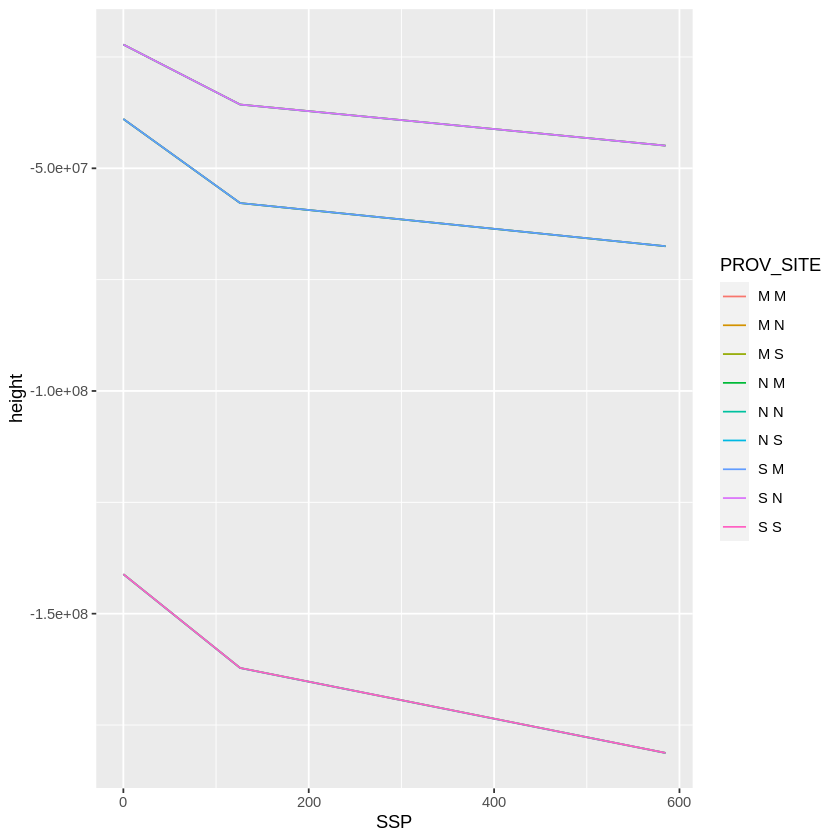

In [41]:
model.1 <- lm(Height ~ 
              S_MAT + 
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sxData)
# R-squared: 0.8358   standard error: 145.1

model.2 <- lm(Height ~ 
              S_MAT + I(S_MAT^2) +
              P_MAP + 
              TX_Lat + 
              TX_Long,
              data = sxData)
# R-squared: 0.8409   standard error: 14

model.3 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              TX_Lat + I(TX_Lat^2) +
              TX_Long,
              data = sxData)
# R-squared: 0.8709   standard error: 128.7

model.4 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) +
              S_MAP + I(S_MAP^2) +
              I((TX_Lat)^2) +
              (TX_Long),
              data = sxData)
# R-squared: 0.8708   standard error: 128.8

model.5 <- lm(Height ~ 
              P_MCMT + I(P_MCMT^2) + 
              S_MAP + I(S_MAP^2), 
              data = sxData)
# R-squared: 0.8428   standard error: 142

model.6 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              S_MAT + I(S_MAT^2), 
              data = sxData)
# R-squared: 0.8411   standard error: 142.8

model.7 <- lm(Height ~ 
              TX_MCMT + I(TX_MCMT^2) + 
              P_MAT + I(P_MAT^2), 
              data = sxData)
# R-squared: 0.8299   standard error: 147.7

model.8 <- lm(Height ~ 
              TX_MAT + I(TX_MAT^2) + 
              S_MCMT + I(S_MCMT^2), 
              data = sxData)




pred_height <- predict(model.14, fcdat2)
pred_table <- tibble (fcdat2$SITE, fcdat2$PROV, fcdat2$SSP, fcdat2$GCM, pred_height) |> 
transmute(SITE = as_factor(fcdat2$SITE),
          PROV = fcdat2$PROV, 
          SSP = fcdat2$SSP, 
          GCM = fcdat2$GCM,
          height = pred_height) |>
mutate(PROV_FCT = factor(PROV,
                        levels = c(34, 40, 63), 
                        labels = c("N", "M", "S")))

pred_table$PROV_SITE <- paste(pred_table$PROV_FCT,pred_table$SITE)

head(pred_table)


pred_table |> 
filter(GCM == 8) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()

pred_table |> 
filter(GCM == 13) |>
ggplot(aes(x=SSP, y=height, color = PROV_SITE)) + geom_line()